# Health Insurance Price Forecast

# Libraries and Settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [2]:
# source: https://github.com/empathy87/storytelling-with-data

# colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

# fonts
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Arial:bold'
plt.rcParams['mathtext.it'] = 'Arial:italic'

In [3]:
# setting random state
rs = 6514

# Data Checking and Cleaning

In [22]:
df = pd.read_csv('../data/insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Exploratory Data Analysis

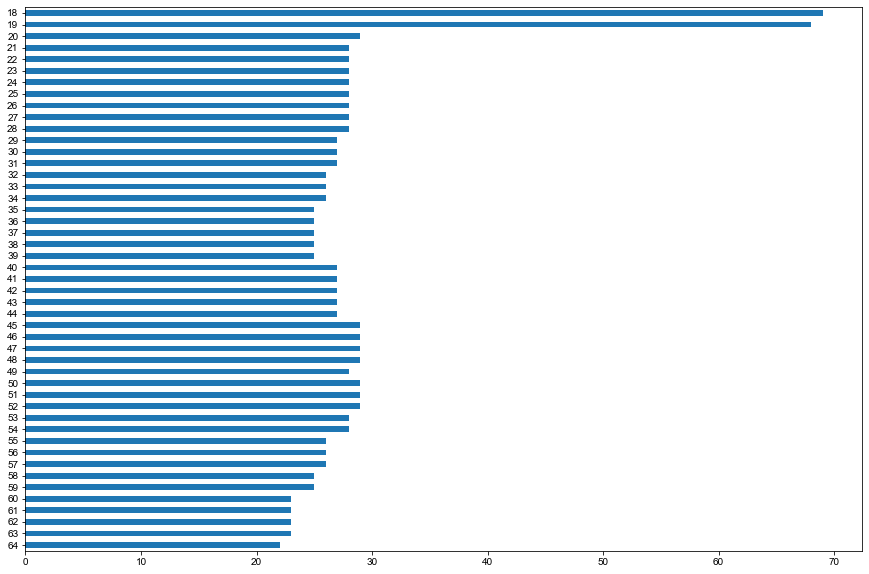

In [8]:
df.age.value_counts().sort_index(ascending = False).plot(kind = 'barh', figsize = (15, 10))
plt.show()

<AxesSubplot:>

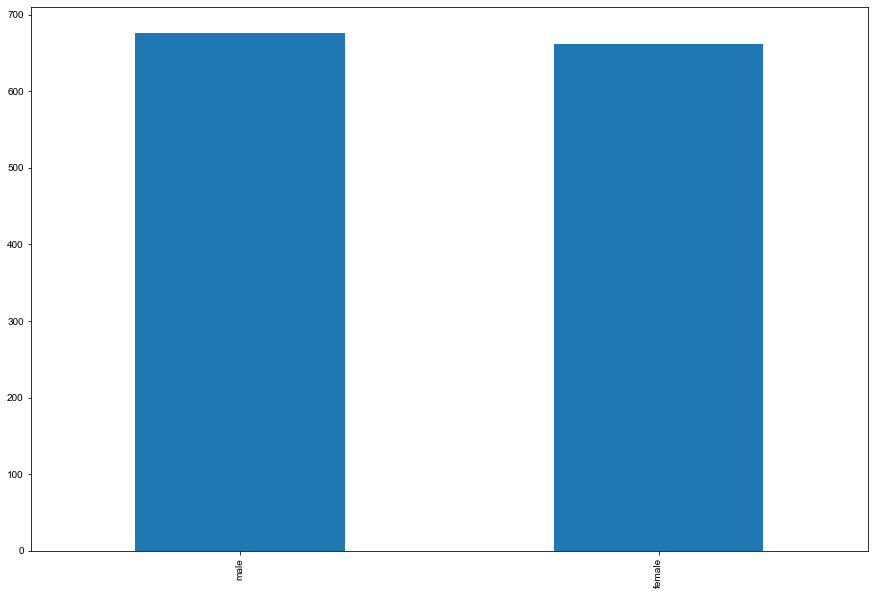

In [9]:
df.sex.value_counts().plot(kind = 'bar', figsize = (15, 10))

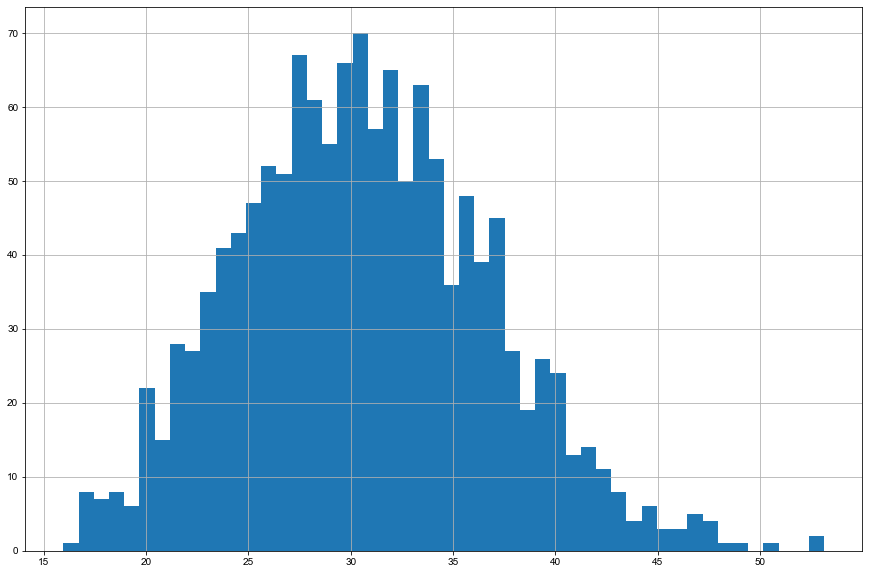

In [10]:
df.bmi.hist(bins = 50, figsize = (15, 10))
plt.show()

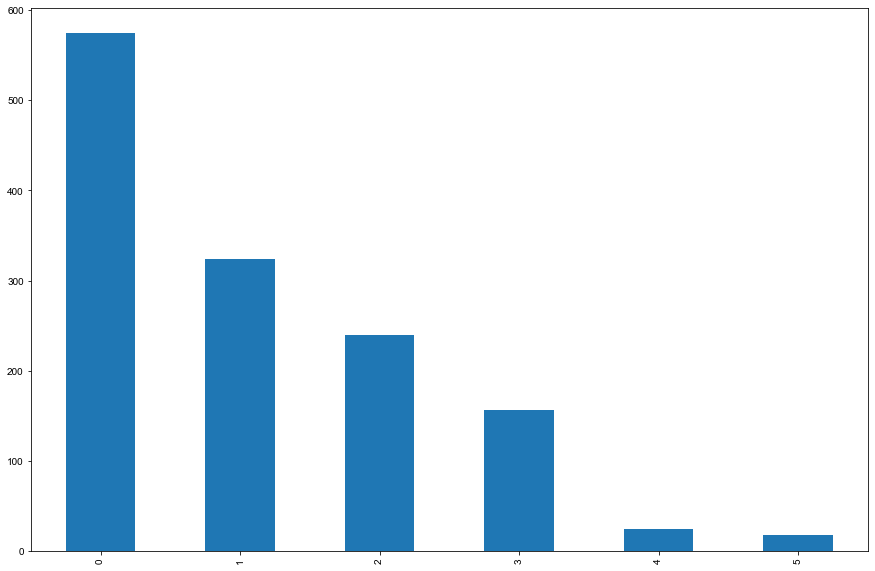

In [11]:
df.children.value_counts().sort_index().plot(kind = 'bar', figsize = (15, 10))
plt.show()

<AxesSubplot:>

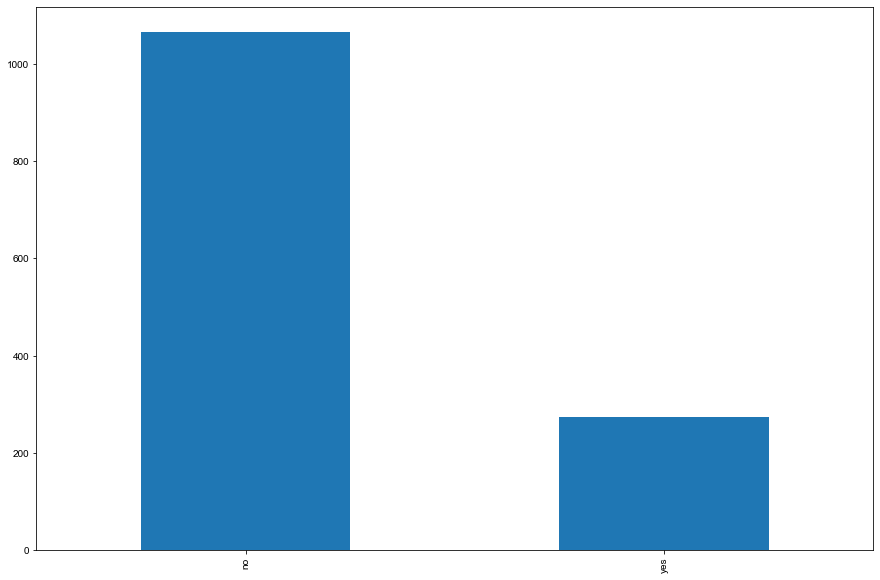

In [12]:
df.smoker.value_counts().plot(kind = 'bar', figsize = (15, 10))

<AxesSubplot:>

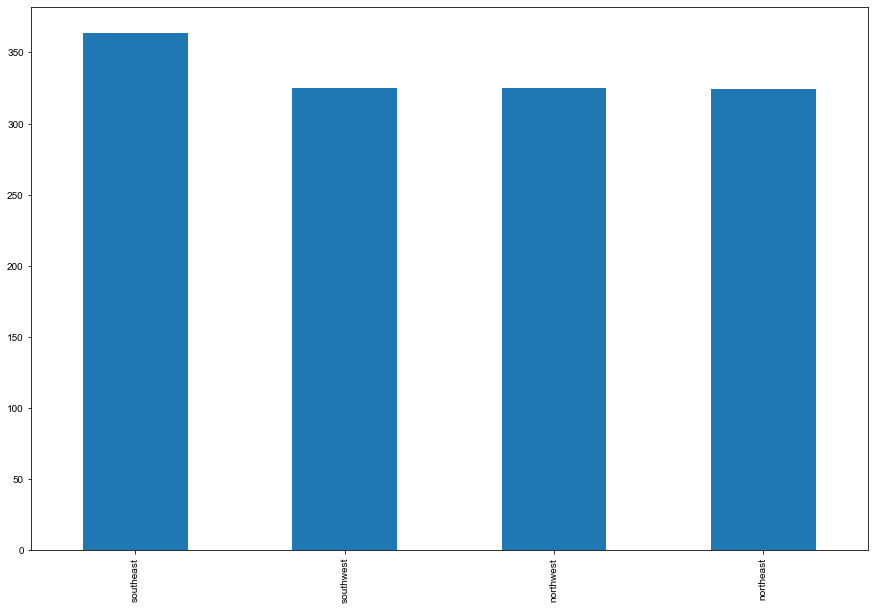

In [13]:
df.region.value_counts().plot(kind = 'bar', figsize = (15, 10))

<AxesSubplot:>

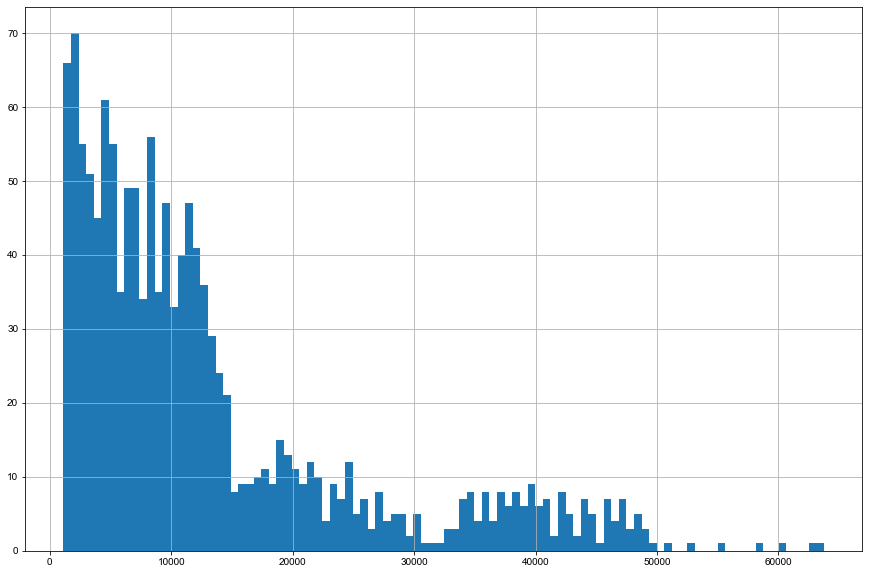

In [14]:
df.charges.hist(bins = 100, figsize = (15, 10))

# Feature Importance

# Model Prediction

In [15]:
df.sex = df.sex.map({"female": 1, "male": 0})
df.region = df.region.map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
df.smoker = df.smoker.map({"yes": 1, "no": 0})

In [ ]:
df = pd.get_dummies(df, columns = [['sex', 'region', 'smoker']])

KeyError: "None of [Index([('sex', 'region', 'smoker')], dtype='object')] are in the [columns]"

In [16]:
X = df.drop('age', axis = 1)
y = df.age

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs)

In [18]:
print(f'X train size: {len(X_train)} || y train size: {len(y_train)}')
print(f'X test size: {len(X_test)} || y train size: {len(y_test)}')

X train size: 1003 || y train size: 1003
X test size: 335 || y train size: 335


In [21]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_preds = model_lr.predict(X_test)
model_lr.score(X_test, y_test)

0.2833811343804893